<h1> Showcasing how to use image processing utility module </h1>

This notebook will go through the various functions available in the basic image processing utility module I created, `impro_utils.py`.

It requires the user to have OpenCV, SciPy, NumPy and Matplotlib installed (most of these should come with a standard installation of Python).

Two images are used in this notebook: a .mat file acquired from a course I took in undergrad and a .jpg file acquired from http://www.facweb.iitkgp.ac.in/~shamik/spring2008/sca/tutorials/download/pami.uwaterloo.ca/tizhoosh/images/test2.jpg.

This example requires some knowledge of the Fourier domain of images. See `fourier_demo.ipynb` for more information.

In [8]:
# Import statements
import impro_utils as imp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 40})

<h3> Loading and displaying a .mat file </h3>

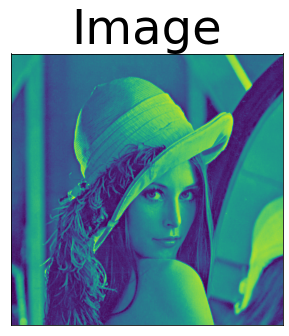

In [9]:
# Loading data
filename = 'lena.mat'
image = imp.load_data(filename)

fig = plt.figure(figsize=(5,5))
imp.plot_img(image)

<h3> Loading a .jpg file </h3>

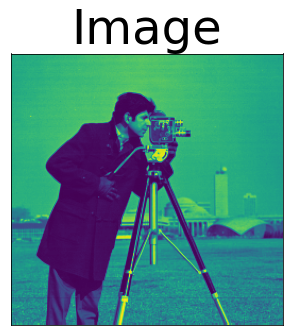

In [19]:
filename = 'test2.jpg'
image = imp.load_data(filename)

fig = plt.figure(figsize=(5,5))
imp.plot_img(image, "Image")

<h3> Increasing apparent resolution of an image </h3>

The .jpg file will be used for the remainder of the example.

The apparent resolution of an image can be increased by zero padding it in k-space, the Fourier transforming back to image space.

Note that this does not affect the true resolution of the image.

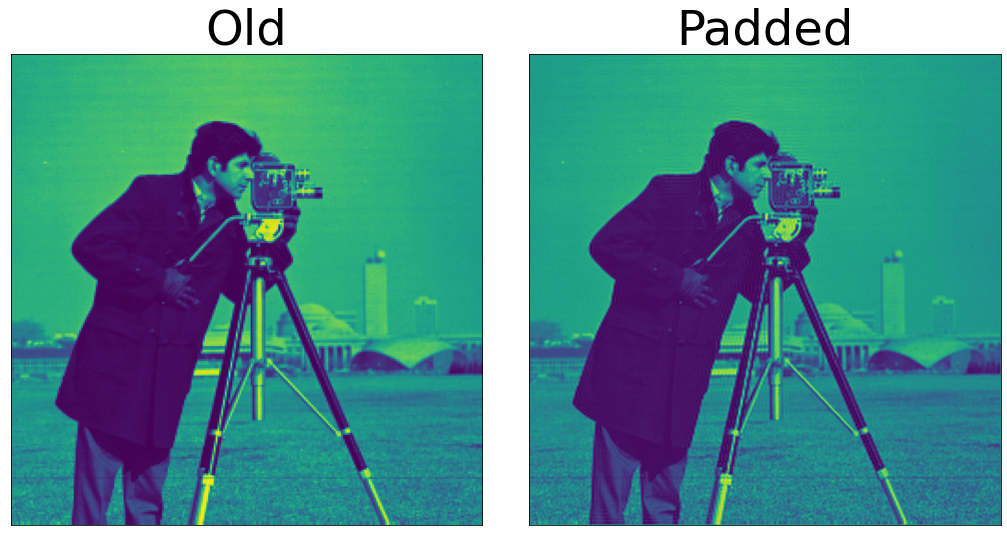

In [18]:
kspace = imp.fft2d(image)

# Zero padding twice the initial image shape
zero_padded_kspace = imp.zero_padder(kspace, np.dot(np.shape(image),2))

zero_padded_image = imp.ifft2d(zero_padded_kspace)

fig = plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
imp.plot_img(abs(image),'Old')
plt.subplot(1,2,2)
# abs is plotted here because the zero_padded_image is a complex array
imp.plot_img(abs(zero_padded_image),'Padded')
plt.tight_layout()

<h3> Low pass filter: averaging and Gaussian kernel </h3>

Demonstration of low pass filter (blurring) on image using an averaging kernel and Gaussian kernel.

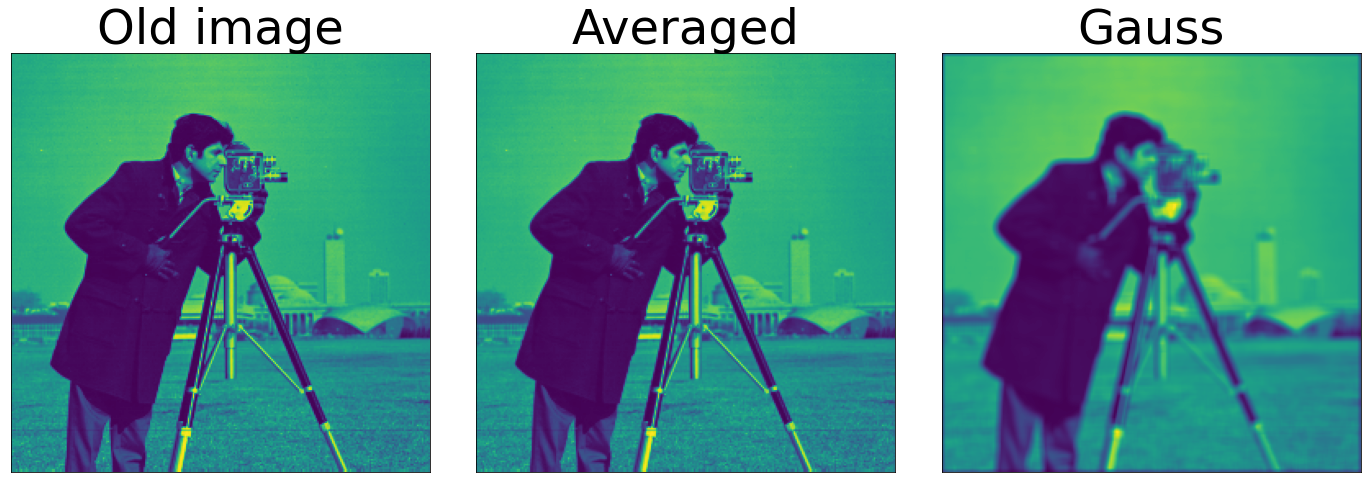

In [13]:
fig = plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
imp.plot_img(abs(image),'Old image')
plt.subplot(1,3,2)
imp.plot_img(abs(imp.low_pass_avg(image)),'Averaged')
plt.subplot(1,3,3)
imp.plot_img(abs(imp.low_pass_gauss(image)),'Gauss')
plt.tight_layout()

<h3> High pass filter </h3>

Demonstration of high pass filter on image (edge enhancement).

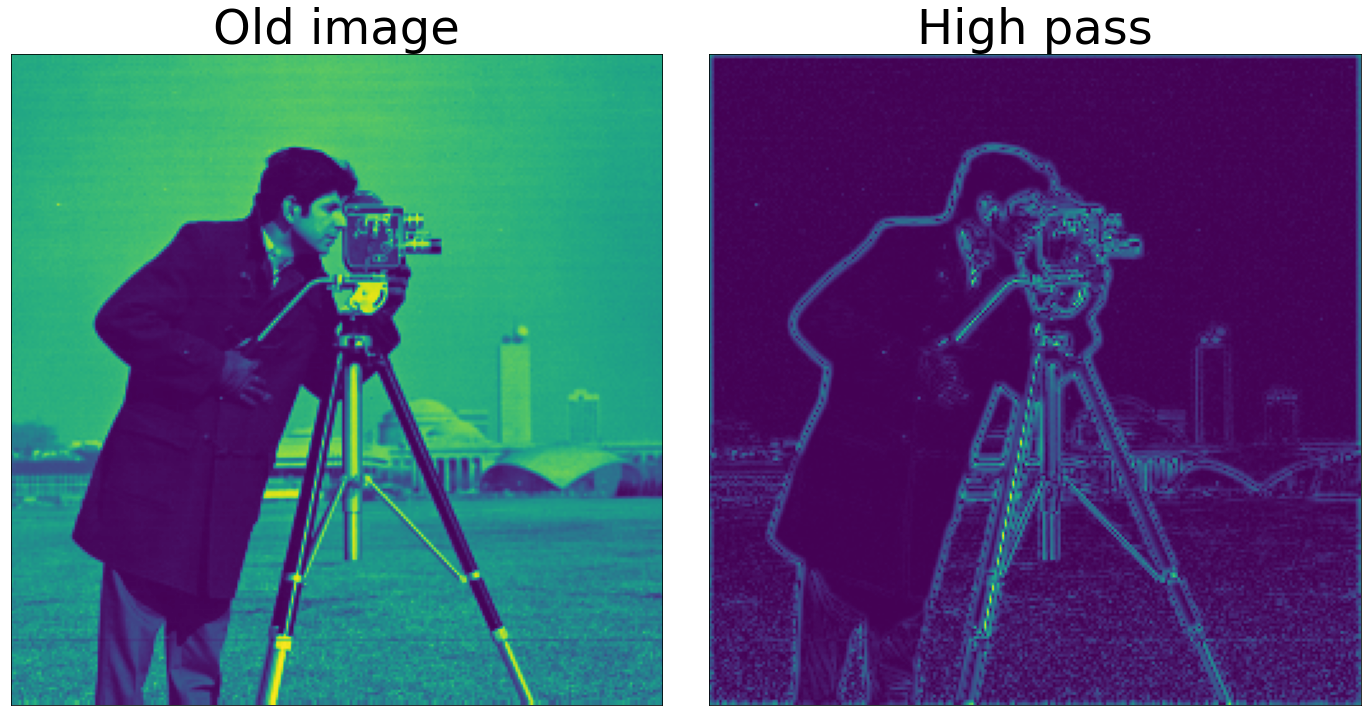

In [14]:
fig = plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
imp.plot_img(abs(image),'Old image')
plt.subplot(1,2,2)
imp.plot_img(abs(imp.high_pass(image)),'High pass')
plt.tight_layout()

<h3> Gradient filters: x and y </h3>

Demonstration of gradient filter on image in x and y.

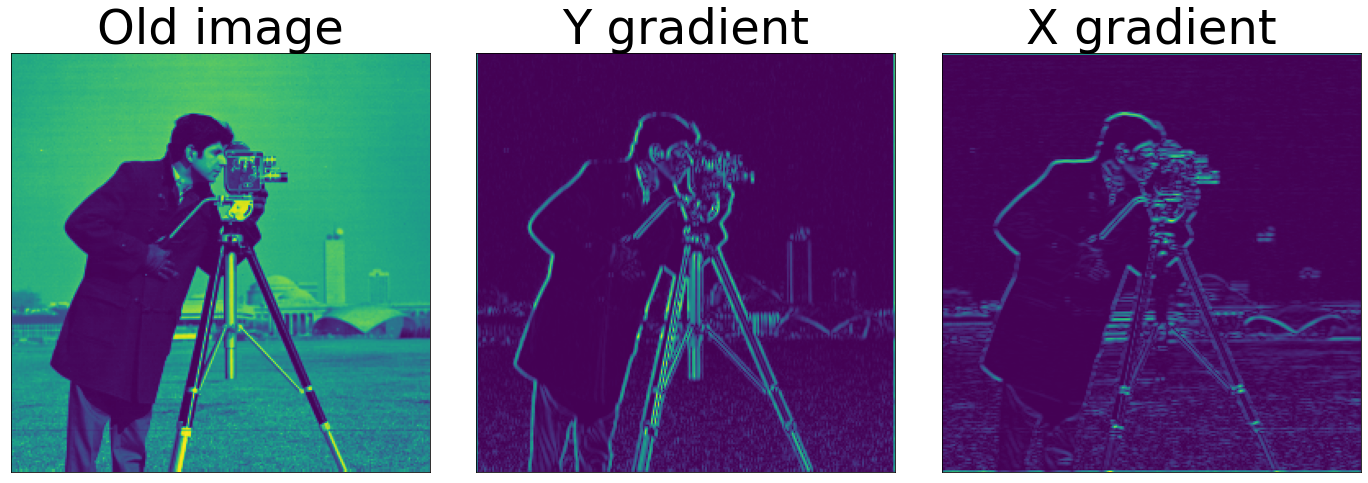

In [15]:
fig = plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
imp.plot_img(abs(image),'Old image')
plt.subplot(1,3,2)
imp.plot_img(abs(imp.y_grad(image)),'Y gradient')
plt.subplot(1,3,3)
imp.plot_img(abs(imp.x_grad(image)),'X gradient')
plt.tight_layout()